In [1]:
import pandas as pd
import os
import numpy as np
import glob
import glob2
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import YearLocator, MonthLocator, DateFormatter

# %matplotlib notebook

## Delete all files that begin at 2018

In [2]:
workspace = os.path.join("..", "data", "precip", "NCDC", "output_stations")
stations = []

for file in glob.glob(os.path.join("..", "data", 'precip', 'NCDC', 'output_stations', "*.csv")):
    df=pd.read_csv(file)
    if df['DATE'][0].startswith("2018"):
        os.remove(file) 

station_names = os.listdir(workspace)
station_names = [item.replace('.csv', '') for item in station_names if item.startswith("US")]

for station in station_names:
    stations.append(station)

In [3]:
comal = pd.read_csv(os.path.join("..", "data", "streamflow", "ComalRv_Spgfl.csv"))
comal.set_index(pd.to_datetime(comal['datetime']), inplace=True)
comal.head()

,datetime,Comal River,Comal Springflow,MaxLevel_J17,MaxLevel_J27
datetime,,,,,
2010-01-02,2010-01-02,317.0,316.0,670.40,862.241
2010-01-03,2010-01-03,317.0,315.0,670.30,862.249
2010-01-04,2010-01-04,317.0,315.0,669.89,862.245
2010-01-05,2010-01-05,317.0,314.0,669.62,862.253
2010-01-06,2010-01-06,317.0,313.0,669.58,862.253


In [4]:
df = pd.read_csv(os.path.join("..", "data", "precip", "NCDC", "output_stations", "US1TXGS0038.csv"))
df.set_index(pd.to_datetime(df['DATE']), inplace=True)
df.head()

,Unnamed: 0,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,DAPR,MDPR,PRCP,TMAX,TMIN
DATE,,,,,,,,,,,,
2012-08-31,17549,US1TXGS0038,"HARPER 5.4 N, TX US",30.3783,-99.2497,642.8,2012-08-31,NaN,NaN,0.0,NaN,NaN
2012-09-01,17550,US1TXGS0038,"HARPER 5.4 N, TX US",30.3783,-99.2497,642.8,2012-09-01,NaN,NaN,0.0,NaN,NaN
2012-09-02,17551,US1TXGS0038,"HARPER 5.4 N, TX US",30.3783,-99.2497,642.8,2012-09-02,NaN,NaN,0.0,NaN,NaN
2012-09-03,17552,US1TXGS0038,"HARPER 5.4 N, TX US",30.3783,-99.2497,642.8,2012-09-03,NaN,NaN,0.0,NaN,NaN
2012-09-04,17553,US1TXGS0038,"HARPER 5.4 N, TX US",30.3783,-99.2497,642.8,2012-09-04,NaN,NaN,0.0,NaN,NaN


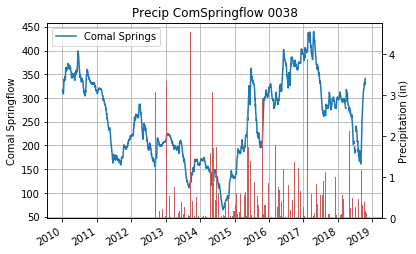

In [5]:
years = YearLocator()  
yearsFmt = DateFormatter('%Y')

fig, ax = plt.subplots()

ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(yearsFmt)
ax.autoscale_view()

df['DATE'] = pd.to_datetime(df['DATE'])
x = df['DATE']
y = df['PRCP']
x1 = comal.index
y1 = comal['MaxLevel_J17']
x2 = comal.index
y2 = comal['Comal Springflow']

ax2 = ax.twinx()
ax2.bar(df.index, df['PRCP'], width=5, facecolor='indianred', label="Precipitation")

ax2.set_xlabel("Date")
ax2.set_ylabel("Precipitation (in)");
# ax2.set_xlabel("Date")

ax.plot(x2, y2, label="Comal Springs")
ax.set_ylabel("Comal Springflow");
ax.set_title(f"Precip ComSpringflow 0038")
ax.legend()
ax.grid()
fig.autofmt_xdate()

plt.savefig(os.path.join("..", "img", "precip_0038_springflow.png"))

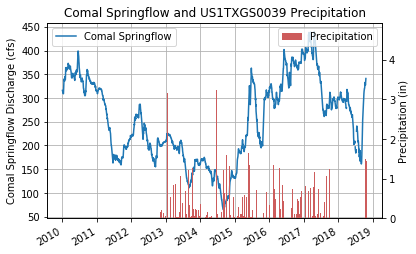

In [22]:
# comal = pd.read_csv(os.path.join("..", "data", "streamflow", "ComalRv_Spgfl.csv"))
# comal.set_index(pd.to_datetime(comal['datetime']), inplace=True)
# comal.head()

# stations = ['USC00417787', 'US1TXGS0038', 'US1TXGS0038', 'US1TXGS0018', 'US1TXKR0079', 'US1TXGS0039', 
#             'US1TXKR0074', 'US1TXGS0039', 'US1TXGS0039', 'US1TXKR0065', 'US1TXGS0039']

# comal_stations = ['USC00417787', 'US1TXGS0018', 'US1TXKR0079', 'US1TXGS0039', 'US1TXKR0074']
# comal_lags = [0, 260, 70, 4, 80]

# j17_stations = ['US1TXGS0038', 'US1TXGS0039', 'US1TXKR0065']
# j17_lags = [2, 2, 140]

# j27_stations = ['US1TXGS0038', 'US1TXGS0039']
# j27_lags = [16, 0]

# comsprings_stations = ['US1TXGS0039']
# comsprings_lags = [11]



comal = pd.read_csv(os.path.join("..", "data", "streamflow", "ComalRv_Spgfl.csv"))
comal.set_index(pd.to_datetime(comal['datetime']), inplace=True)
comal.head()

df = pd.read_csv(os.path.join("..", "data", "precip", "NCDC", "output_stations", "US1TXGS0039.csv"))
df.set_index(pd.to_datetime(df['DATE']), inplace=True)
df = df.shift(11)
years = YearLocator()  
yearsFmt = DateFormatter('%Y')
fig, ax = plt.subplots()

ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(yearsFmt)
ax.autoscale_view()
df['DATE'] = pd.to_datetime(df['DATE'])

x = df['DATE']
y = df['PRCP']
x1 = comal.index
y1 = comal['Comal Springflow']

ax2 = ax.twinx()
ax2.bar(df.index, df['PRCP'], width=5, facecolor='indianred', label="Precipitation")
ax2.set_xlabel("Date")
ax2.set_ylabel("Precipitation (in)");

ax.plot(x1, y1, label="Comal Springflow")
ax.set_ylabel("Comal Springflow Discharge (cfs)");
ax.set_title("Comal Springflow and US1TXGS0039 Precipitation")
ax.legend(loc="upper left")
ax2.legend(loc="upper right")
ax.grid()
fig.autofmt_xdate()
plt.savefig(os.path.join("..", "img", f"precip_US1TXGS0039_springfl.png"))

In [ ]:
comal = pd.read_csv(os.path.join("..", "data", "streamflow", "ComalRv_Spgfl.csv"))
comal.set_index(pd.to_datetime(comal['datetime']), inplace=True)
comal.head()

precip_corrs = []
precip_stations = []
precip_lags = []
match = []

for station in stations:
    
    df = pd.read_csv(os.path.join("..", "data", "precip", "NCDC", "output_stations", station+".csv"))
    df.set_index(pd.to_datetime(df['DATE']), inplace=True)
    
    years = YearLocator()  
    yearsFmt = DateFormatter('%Y')
#     fig, ax = plt.subplots()

#     ax.xaxis.set_major_locator(years)
#     ax.xaxis.set_major_formatter(yearsFmt)
#     ax.autoscale_view()

#     df['DATE'] = pd.to_datetime(df['DATE'])
#     x = df['DATE']
#     y = df['PRCP']
#     x1 = comal.index
#     y1 = comal['MaxLevel_J17']
#     x2 = comal.index
#     y2 = comal['Comal River']
#     y3 = comal['springflow']

#     ax2 = ax.twinx()
#     ax2.bar(df.index, df['PRCP'], width=5, facecolor='indianred', label="Precipitation")
#     ax2.set_xlabel("Date")
#     ax2.set_ylabel("Precipitation (in)");

#     ax.plot(x2, y3, label="Comal Springs")
#     ax.set_ylabel("Comal Springs");
#     ax.set_title(f"Comal Springs - Precip {station}")
#     ax.legend()
#     ax.grid()
#     fig.autofmt_xdate()
#     plt.savefig(os.path.join("..", "img", f"precip_{station}_springflow.png"))
    
    days = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 16, 18, 
            20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 
            48, 50, 52, 54, 56, 58, 60, 70, 80, 90, 100, 120, 140, 
            160, 180, 200, 220, 240, 260, 280, 300]
    
    for day in days:
        df = df.shift(day)
        corr_coeff_J17 = df['PRCP'].corr(comal['MaxLevel_J17'])
        corr_coeff_J27 = df['PRCP'].corr(comal['MaxLevel_J27'])
        corr_coeff_ComRv = df['PRCP'].corr(comal['Comal River'])
#         corr_coeff_ComRvnc = df['PRCP'].corr(comal['Comal Rv (nc)'])
#         corr_coeff_ComRvoc = df['PRCP'].corr(comal['Comal Rv (oc)'])
        corr_coeff_springflow = df['PRCP'].corr(comal['Comal Springflow'])
        
        if corr_coeff_J17 >= 0.2:
            precip_corrs.append(corr_coeff_J17)
            precip_lags.append(day)
            precip_stations.append(station)
            match.append("J17")
            print(f"J17 {day},", corr_coeff_J17, station)
        elif corr_coeff_J27 >= 0.2:
            precip_corrs.append(corr_coeff_J27)
            precip_lags.append(day)
            precip_stations.append(station)
            match.append("J27")
            print(f"J27 {day},", corr_coeff_J27, station)
        elif corr_coeff_ComRv >= 0.2:
            precip_corrs.append(corr_coeff_ComRv)
            precip_lags.append(day)
            precip_stations.append(station)
            match.append("Comal River")
            print(f"ComRv {day},", corr_coeff_ComRv, station)
            
#         elif corr_coeff_ComRvnc >= 0.2:
#             print(f"ComRv (nc) {day},", corr_coeff_ComRvnc, station)
#         elif corr_coeff_ComRvoc >= 0.2:
#             print(f"ComRv (oc) {day},", corr_coeff_ComRvoc, station)

        elif corr_coeff_springflow >= 0.2:
            precip_corrs.append(corr_coeff_springflow)
            precip_lags.append(day)
            precip_stations.append(station)
            match.append("Comal Springs")
            print(f"ComSpring {day},", corr_coeff_springflow, station)

In [ ]:
precip_lags, precip_corrs, precip_stations, match
print(len(precip_lags), len(precip_corrs), len(precip_stations), len(match))

In [ ]:
df = pd.DataFrame(
    {'Station': precip_stations,
     'Parameter': match,
     'Time Lag (days)': precip_lags,
     'Corr Coeff': precip_corrs    
    })
df.sort_values('Corr Coeff', inplace=True, ascending=False)
print(df)
df.to_csv(os.path.join("..", "data", "streamflow", "precip_correlations.csv"))
